<a href="https://colab.research.google.com/github/Sara-DaCanal/Progetto-ML/blob/main/progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto di Machine Learning

* Adrian Petru Baba
* Sara Da Canal

### Introduzione

Questo Notebook propone l'analisi di modelli di Machine Learning usati per eseguire una classificazione binaria su un dataset di funghi, per stabilire se sono edibili o velenosi. Inizialmente abbiamo effettuato una fase di preprocessing dei dati, per andare ad ottenere un dataset di qualità, poi siamo andati a testare differenti modelli di machine learning effettuando tuning dei parametri per stabilire quale modello è il migliore per il task considerato.

In [70]:
import pandas as pd
from typing import Tuple
from scipy.stats import mode
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
path_to_dataset = '/content/drive/MyDrive/secondary_data_shuffled.csv'

In [5]:
df = pd.read_csv(path_to_dataset, sep=';')
print(df.columns)
print(df.shape)

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')
(61069, 21)


Abbiamo letto il dataset importandolo come un Dataframe pandas.
Come si può vedere qui sopra, il dataset comprende 21 colonne, di cui 20 sono feature è la prima è il valore target, e 61.069 righe. Di queste colonne, tre hanno valori numerici, mentre tutte le altre presentano valori categorici. Le colonne dei valori categorici sono indicate tramite singole lettere, il che rende il dataset di difficile lettura. In più, anche valori binari sono indicati con le lettere 't' ed 'f' invece che usare 0 e 1. Abbiamo quindi modificato il dataset per renderlo più leggibile. Dopo le modifiche è possibile vedere quante colonne sono categoriche, quante booleane e quante numeriche.

In [6]:
df['cap-shape'].replace(to_replace = 'b', value='bell', inplace=True)
df['cap-shape'].replace(to_replace = 'c', value='conical', inplace=True)
df['cap-shape'].replace(to_replace = 'x', value='convex', inplace=True)
df['cap-shape'].replace(to_replace = 'f', value='flat', inplace=True)
df['cap-shape'].replace(to_replace = 's', value='sunken', inplace=True)
df['cap-shape'].replace(to_replace = 'p', value='spherical', inplace=True)
df['cap-shape'].replace(to_replace = '0', value='other', inplace=True)

df['cap-surface'].replace(to_replace = 'i', value='fibrous', inplace=True)
df['cap-surface'].replace(to_replace = 'g', value='grooves', inplace=True)
df['cap-surface'].replace(to_replace = 'y', value='scaly', inplace=True)
df['cap-surface'].replace(to_replace = 's', value='smooth', inplace=True)
df['cap-surface'].replace(to_replace = 'd', value='dry', inplace=True)
df['cap-surface'].replace(to_replace = 'h', value='shiny', inplace=True)
df['cap-surface'].replace(to_replace = 'l', value='leathery', inplace=True)
df['cap-surface'].replace(to_replace = 'k', value='silky', inplace=True)
df['cap-surface'].replace(to_replace = 't', value='sticky', inplace=True)
df['cap-surface'].replace(to_replace = 'w', value='wrinkled', inplace=True)
df['cap-surface'].replace(to_replace = 'e', value='fleshy', inplace=True)

df['cap-color'].replace(to_replace = 'n', value='brown', inplace=True)
df['cap-color'].replace(to_replace = 'b', value='buff', inplace=True)
df['cap-color'].replace(to_replace = 'g', value='grey', inplace=True)
df['cap-color'].replace(to_replace = 'r', value='green', inplace=True)
df['cap-color'].replace(to_replace = 'p', value='pink', inplace=True)
df['cap-color'].replace(to_replace = 'u', value='purple', inplace=True)
df['cap-color'].replace(to_replace = 'e', value='red', inplace=True)
df['cap-color'].replace(to_replace = 'w', value='white', inplace=True)
df['cap-color'].replace(to_replace = 'y', value='yellow', inplace=True)
df['cap-color'].replace(to_replace = 'l', value='blue', inplace=True)
df['cap-color'].replace(to_replace = 'o', value='orange', inplace=True)
df['cap-color'].replace(to_replace = 'k', value='black', inplace=True)

df['does-bruise-or-bleed'].replace(to_replace = 't', value=True, inplace=True)
df['does-bruise-or-bleed'].replace(to_replace = 'f', value=False, inplace=True)

df['gill-attachment'].replace(to_replace = 'a', value='adnate', inplace=True)
df['gill-attachment'].replace(to_replace = 'x', value='adnexed', inplace=True)
df['gill-attachment'].replace(to_replace = 'd', value='decurrent', inplace=True)
df['gill-attachment'].replace(to_replace = 'e', value='free', inplace=True)
df['gill-attachment'].replace(to_replace = 's', value='sinuate', inplace=True)
df['gill-attachment'].replace(to_replace = 'p', value='pores', inplace=True)
df['gill-attachment'].replace(to_replace = 'f', value='none', inplace=True)
df['gill-attachment'].replace(to_replace = '?', value='unknown', inplace=True)

df['gill-spacing'].replace(to_replace = 'c', value='close', inplace=True)
df['gill-spacing'].replace(to_replace = 'd', value='distant', inplace=True)
df['gill-spacing'].replace(to_replace = 'f', value='none', inplace=True)

df['gill-color'].replace(to_replace = 'n', value='brown', inplace=True)
df['gill-color'].replace(to_replace = 'b', value='buff', inplace=True)
df['gill-color'].replace(to_replace = 'g', value='grey', inplace=True)
df['gill-color'].replace(to_replace = 'r', value='green', inplace=True)
df['gill-color'].replace(to_replace = 'p', value='pink', inplace=True)
df['gill-color'].replace(to_replace = 'u', value='purple', inplace=True)
df['gill-color'].replace(to_replace = 'e', value='red', inplace=True)
df['gill-color'].replace(to_replace = 'w', value='white', inplace=True)
df['gill-color'].replace(to_replace = 'y', value='yellow', inplace=True)
df['gill-color'].replace(to_replace = 'l', value='blue', inplace=True)
df['gill-color'].replace(to_replace = 'o', value='orange', inplace=True)
df['gill-color'].replace(to_replace = 'k', value='black', inplace=True)
df['gill-color'].replace(to_replace = 'f', value='none', inplace=True)

df['stem-root'].replace(to_replace = 'b', value='bulbous', inplace=True)
df['stem-root'].replace(to_replace = 's', value='swollen', inplace=True)
df['stem-root'].replace(to_replace = 'c', value='club', inplace=True)
df['stem-root'].replace(to_replace = 'u', value='cup', inplace=True)
df['stem-root'].replace(to_replace = 'e', value='equal', inplace=True)
df['stem-root'].replace(to_replace = 'z', value='rhizomorphs', inplace=True)
df['stem-root'].replace(to_replace = 'r', value='rooted', inplace=True)

df['stem-surface'].replace(to_replace = 'i', value='fibrous', inplace=True)
df['stem-surface'].replace(to_replace = 'g', value='grooves', inplace=True)
df['stem-surface'].replace(to_replace = 'y', value='scaly', inplace=True)
df['stem-surface'].replace(to_replace = 's', value='smooth', inplace=True)
df['stem-surface'].replace(to_replace = 'd', value='dry', inplace=True)
df['stem-surface'].replace(to_replace = 'h', value='shiny', inplace=True)
df['stem-surface'].replace(to_replace = 'l', value='leathery', inplace=True)
df['stem-surface'].replace(to_replace = 'k', value='silky', inplace=True)
df['stem-surface'].replace(to_replace = 't', value='sticky', inplace=True)
df['stem-surface'].replace(to_replace = 'w', value='wrinkled', inplace=True)
df['stem-surface'].replace(to_replace = 'e', value='fleshy', inplace=True)
df['stem-surface'].replace(to_replace = 'f', value='none', inplace=True)

df['stem-color'].replace(to_replace = 'n', value='brown', inplace=True)
df['stem-color'].replace(to_replace = 'b', value='buff', inplace=True)
df['stem-color'].replace(to_replace = 'g', value='grey', inplace=True)
df['stem-color'].replace(to_replace = 'r', value='green', inplace=True)
df['stem-color'].replace(to_replace = 'p', value='pink', inplace=True)
df['stem-color'].replace(to_replace = 'u', value='purple', inplace=True)
df['stem-color'].replace(to_replace = 'e', value='red', inplace=True)
df['stem-color'].replace(to_replace = 'w', value='white', inplace=True)
df['stem-color'].replace(to_replace = 'y', value='yellow', inplace=True)
df['stem-color'].replace(to_replace = 'l', value='blue', inplace=True)
df['stem-color'].replace(to_replace = 'o', value='orange', inplace=True)
df['stem-color'].replace(to_replace = 'k', value='black', inplace=True)
df['stem-color'].replace(to_replace = 'f', value='none', inplace=True)

df['veil-type'].replace(to_replace = 'p', value=False, inplace=True)
df['veil-type'].replace(to_replace = 'u', value=True, inplace=True)
df['veil-type'].rename("universal-veil")

df['veil-color'].replace(to_replace = 'n', value='brown', inplace=True)
df['veil-color'].replace(to_replace = 'b', value='buff', inplace=True)
df['veil-color'].replace(to_replace = 'g', value='grey', inplace=True)
df['veil-color'].replace(to_replace = 'r', value='green', inplace=True)
df['veil-color'].replace(to_replace = 'p', value='pink', inplace=True)
df['veil-color'].replace(to_replace = 'u', value='purple', inplace=True)
df['veil-color'].replace(to_replace = 'e', value='red', inplace=True)
df['veil-color'].replace(to_replace = 'w', value='white', inplace=True)
df['veil-color'].replace(to_replace = 'y', value='yellow', inplace=True)
df['veil-color'].replace(to_replace = 'l', value='blue', inplace=True)
df['veil-color'].replace(to_replace = 'o', value='orange', inplace=True)
df['veil-color'].replace(to_replace = 'k', value='black', inplace=True)
df['veil-color'].replace(to_replace = 'f', value='none', inplace=True)

df['has-ring'].replace(to_replace = 't', value=True, inplace=True)
df['has-ring'].replace(to_replace = 'f', value=False, inplace=True)

df['ring-type'].replace(to_replace = 'c', value='cobwebby', inplace=True)
df['ring-type'].replace(to_replace = 'e', value='evanescent', inplace=True)
df['ring-type'].replace(to_replace = 'r', value='flaring', inplace=True)
df['ring-type'].replace(to_replace = 'g', value='grooved', inplace=True)
df['ring-type'].replace(to_replace = 'l', value='large', inplace=True)
df['ring-type'].replace(to_replace = 'p', value='pendant', inplace=True)
df['ring-type'].replace(to_replace = 's', value='sheathing', inplace=True)
df['ring-type'].replace(to_replace = 'z', value='zone', inplace=True)
df['ring-type'].replace(to_replace = 'y', value='scaly', inplace=True)
df['ring-type'].replace(to_replace = 'm', value='movable', inplace=True)
df['ring-type'].replace(to_replace = 'f', value='none', inplace=True)

df['spore-print-color'].replace(to_replace = 'n', value='brown', inplace=True)
df['spore-print-color'].replace(to_replace = 'b', value='buff', inplace=True)
df['spore-print-color'].replace(to_replace = 'g', value='grey', inplace=True)
df['spore-print-color'].replace(to_replace = 'r', value='green', inplace=True)
df['spore-print-color'].replace(to_replace = 'p', value='pink', inplace=True)
df['spore-print-color'].replace(to_replace = 'u', value='purple', inplace=True)
df['spore-print-color'].replace(to_replace = 'e', value='red', inplace=True)
df['spore-print-color'].replace(to_replace = 'w', value='white', inplace=True)
df['spore-print-color'].replace(to_replace = 'y', value='yellow', inplace=True)
df['spore-print-color'].replace(to_replace = 'l', value='blue', inplace=True)
df['spore-print-color'].replace(to_replace = 'o', value='orange', inplace=True)
df['spore-print-color'].replace(to_replace = 'k', value='black', inplace=True)

df['habitat'].replace(to_replace = 'g', value='grasses', inplace=True)
df['habitat'].replace(to_replace = 'l', value='leaves', inplace=True)
df['habitat'].replace(to_replace = 'm', value='meadows', inplace=True)
df['habitat'].replace(to_replace = 'p', value='paths', inplace=True)
df['habitat'].replace(to_replace = 'h', value='heaths', inplace=True)
df['habitat'].replace(to_replace = 'u', value='urban', inplace=True)
df['habitat'].replace(to_replace = 'w', value='waste', inplace=True)
df['habitat'].replace(to_replace = 'd', value='woods', inplace=True)

df['season'].replace(to_replace = 's', value='spring', inplace=True)
df['season'].replace(to_replace = 'u', value='summer', inplace=True)
df['season'].replace(to_replace = 'w', value='winter', inplace=True)
df['season'].replace(to_replace = 'a', value='autumn', inplace=True)

df['class'].replace(to_replace = 'e', value=True, inplace=True)
df['class'].replace(to_replace = 'p', value=False, inplace=True)

In [7]:
numerical_cols = df.select_dtypes(include='number').columns.to_list()
print("Le feature numeriche sono:" ,numerical_cols)
print("Il numero di feature numeriche è:", len(numerical_cols))
categorical_cols = df.select_dtypes(include='object').columns.to_list()
print("Le feature categoriche sono:" ,categorical_cols)
print("Il numero di feature categoriche è:", len(categorical_cols))
boolean_cols = df.select_dtypes(include='bool').columns.to_list()
print("Le feature booleane sono:" ,boolean_cols)
print("Il numero di feature boolean è:", len(boolean_cols))

Le feature numeriche sono: ['cap-diameter', 'stem-height', 'stem-width']
Il numero di feature numeriche è: 3
Le feature categoriche sono: ['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color', 'habitat', 'season']
Il numero di feature categoriche è: 15
Le feature booleane sono: ['class', 'does-bruise-or-bleed', 'has-ring']
Il numero di feature boolean è: 3


## Preprocessing del dataset
Per andare ad ottenere un dataset coerente siamo andati a verificare la presenza di valori nulli nelle colonne, usando la seguente funzione:

In [8]:
def get_nan_cols(dataset: pd.DataFrame) -> Tuple[pd.DataFrame, pd.Index]:
    """ Restituisce:
        0: un dataframe con nome colonna, numero null
        1: una lista (Index) con i nomi delle colonne che hanno valori nulli
    """
    count_nan = dataset.isnull().sum(axis=0)
    columns_with_nan_df = count_nan.loc[count_nan != 0]
    nan_cols_names = dataset.columns[dataset.isna().any()]
    return columns_with_nan_df, nan_cols_names

nan_cols, nan_list = get_nan_cols(df)
print(nan_cols)

cap-surface          14120
gill-attachment       9884
gill-spacing         25063
stem-root            51538
stem-surface         38124
veil-type            57892
veil-color           53656
ring-type             2471
spore-print-color    54715
dtype: int64


Come si può vedere dall'output, abbiamo valori nulli in 9 colonne su 20.

In questa fase abbiamo eliminato dal dataset le colonne relative a feature in cui c'è una percentuale di valori nulli maggiore rispetto a una specifica soglia (nello specifico **75%**).
Possiamo vedere il numero minimo di valori non nulli richiesto per non cancellare la colonna.
Dal numero iniziale, con questa pulizia rimangono solo **14** feature.

In [9]:
righe = df.shape[0]
p = 0.75
def remove_nan_columns(dataset: pd.DataFrame, threshold) -> pd.DataFrame:
    """Elimina colonne con valori NaN quando i valori Nan sono superiori a [threshold]%"""
    thresh = int((len(dataset) * threshold)) + 1
    print("Numero di valori non nulli minimo: ", thresh)
    # axis: specifichiamo di eliminare solo le colonne; thresh: numero minimo per eliminare
    dataset.dropna(axis='columns', thresh=thresh, inplace=True)
    return dataset

new_data = remove_nan_columns(df, p)
print("Il numero di feature ora è:" ,new_data.shape[1])



Numero di valori non nulli minimo:  45802
Il numero di feature ora è: 15


In [10]:
numerical_cols = df.select_dtypes(include='number').columns.to_list()

categorical_cols = df.select_dtypes(include='object').columns.to_list()

boolean_cols = df.select_dtypes(include='bool').columns.to_list()
print('Abbiamo', len(numerical_cols), 'colonne numeriche,', len(categorical_cols), 'colonne categoriche e', len(boolean_cols), 'colonne booleane.')

Abbiamo 3 colonne numeriche, 9 colonne categoriche e 3 colonne booleane.


Di seguito possiamo vedere quali, fra le rimanenti feature, hanno qualche valore nullo (ma non a sufficienza per essere cancellate in base al threshold scelto).
Di fatto, tra le colonne riguardanti feature con valori numerici o booleani, non abbiamo alcun valore null; al contrario, per le feature con valori categorici, abbiamo diversi null.
Nel caso numerico, qualora ce ne fosse stato bisogno, i valori mancanti sarebbero potuti essere riempiti per esempio dalla media del valore di quella feature o con qualche strategia simile.
Nel caso categorico, abbiamo scelto di riempire gli spazi vuoti con la moda del valore della feature corrispondente.

In [11]:
nan_cols, nan_list = get_nan_cols(df)
print(nan_cols)

cap-surface        14120
gill-attachment     9884
ring-type           2471
dtype: int64


Qui di seguito andiamo a calcolare la moda per le colonne considerate, andando anche a mostrare, nei grafici a torta, le distribuzioni percentuali dei diversi valori, in modo da poter visualizzare se la moda copre effettivamente una parte significativa dei valori oppure se ci sono valori che hanno tutti percentuali molto simili tra loro. Come si può vedere, in tutti e tre i casi la moda è molto significativa, quindi la nostra scelta sembra corretta.

La moda per la colonna cap-surface è: sticky
La moda per la colonna gill-attachment è: adnate
La moda per la colonna ring-type è: none


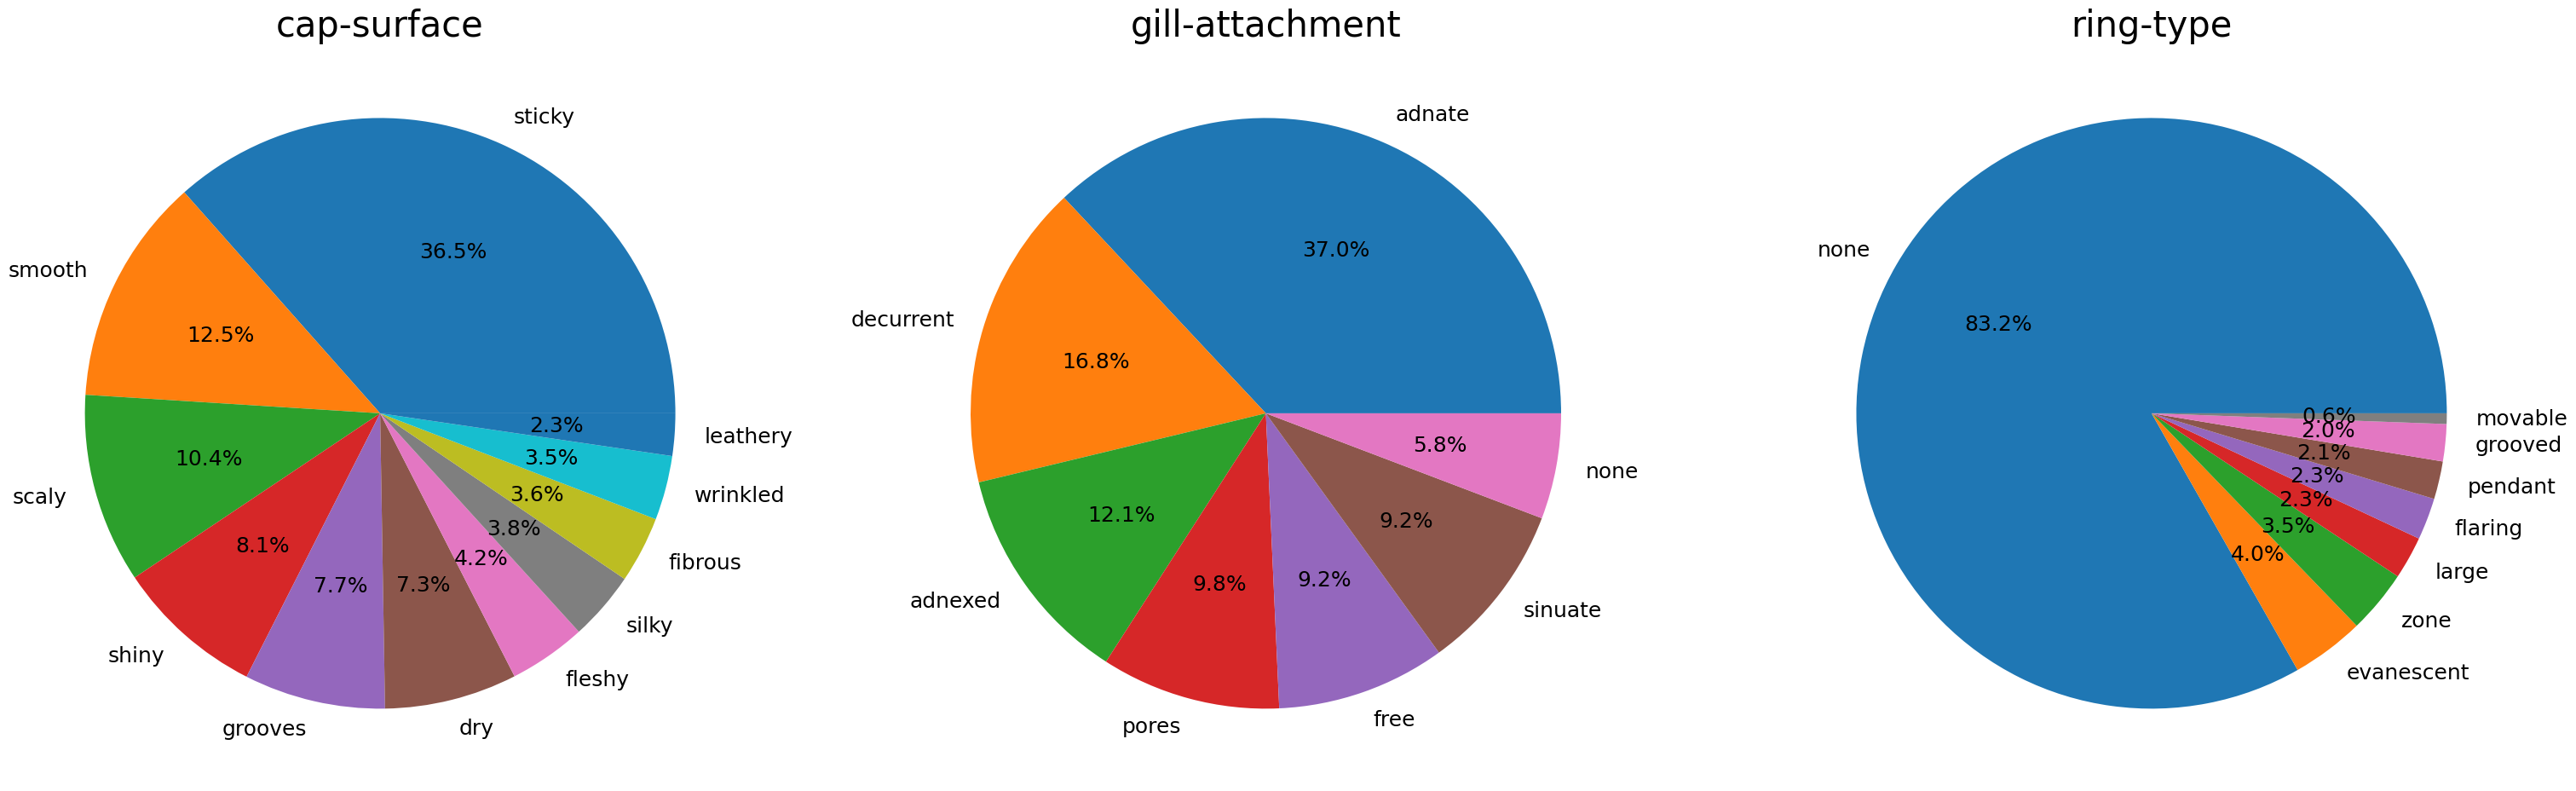

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(38, 15))
y=0
for elem in categorical_cols:
  if elem in nan_list:
    col = df[elem]
    mode = col.mode()
    print('La moda per la colonna', col.name, 'è:', mode.iloc[0])
    df1 = col.fillna(mode.iloc[0], inplace=True)
    percentages = col.value_counts(normalize=True) * 100
    ax = percentages.plot.pie(ax=axes[y], autopct='%1.1f%%', fontsize=18)
    ax.set_title(col.name, fontsize=30)

    ax.set_ylabel('')
    y+=1
plt.show()


Il grafico seguente mostra le correlazioni tra le tre classi con valori NaN e il target. Come possiamo vedere, alcune categorie hanno una correlazione con il target abbastanza alta, ovvero hanno una media dei risultati molto spostata verso i positivi o i negativi. Le tre categorie prese come moda però hanno una correlazione abbastanza bassa, con valori di 0.43, 0.37 e 0.45 rispettivamente, quindi sostituire i NaN con la moda non rende il dataset inconsistente.

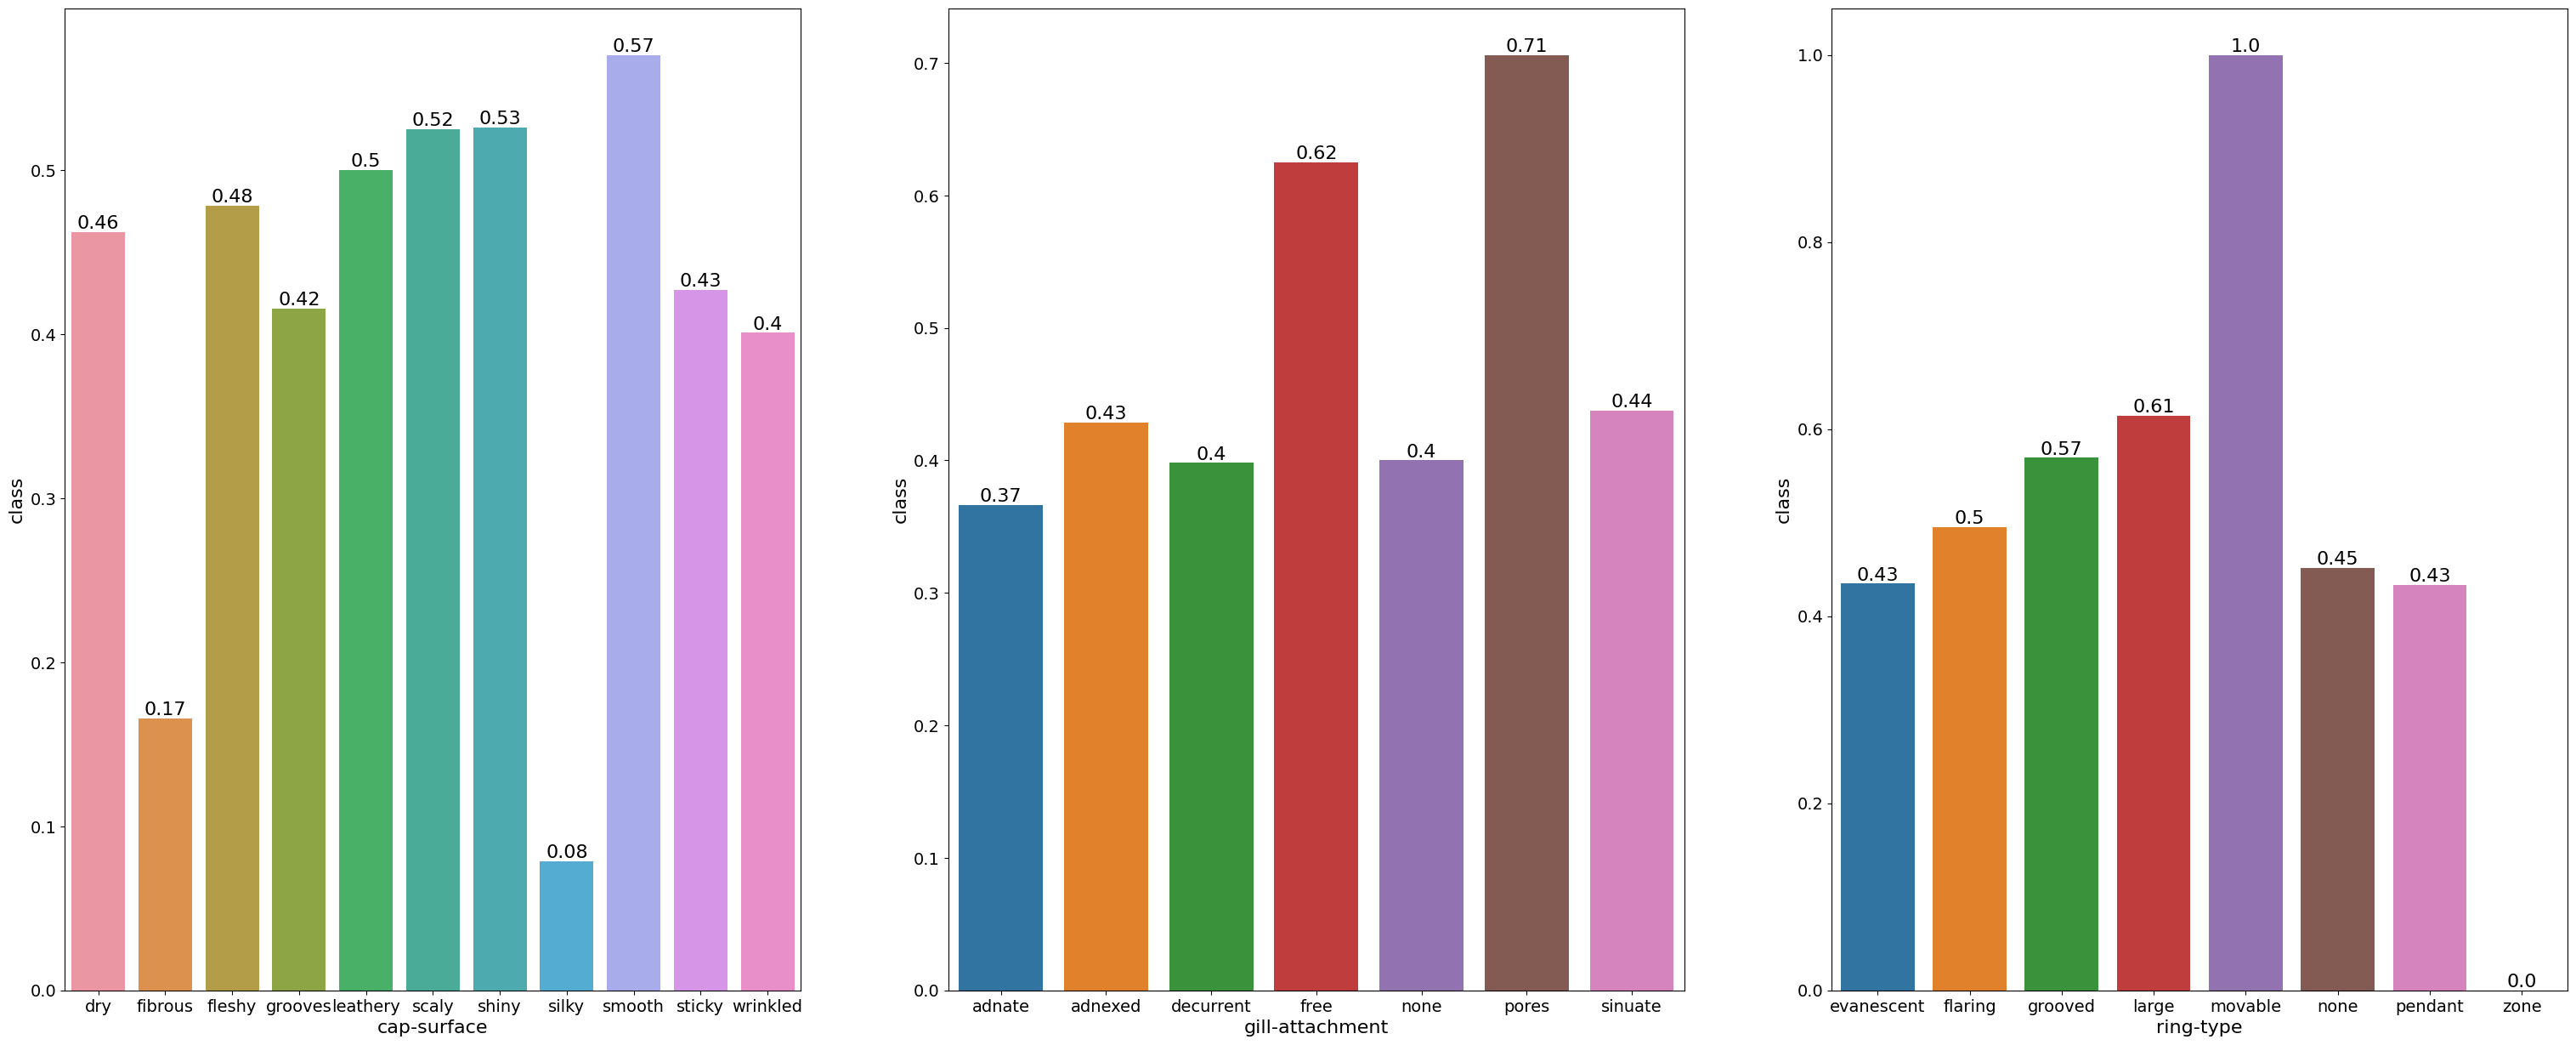

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(38, 15))
y = 0
target = df['class']
for elem in nan_list:
  col = df[elem]
  correlation = df.groupby(col.name)[target.name].mean().reset_index()


  ax = sns.barplot(x=col.name, y=target.name, data=correlation, ax=axes[y])

  for i, val in enumerate(correlation[target.name]):
    axes[y].text(i, val, round(val, 2), horizontalalignment='center', verticalalignment='bottom', fontsize=16)
  axes[y].set_xlabel(col.name, fontsize=16)
  axes[y].set_ylabel(target.name, fontsize=16)

  ax.tick_params(axis='x', labelsize=14)
  ax.tick_params(axis='y', labelsize=14)
  y+=1


# Mostra il grafico
plt.show()


L'ultimo controllo da fare è controllare se le classi target sono bilanciate. Come si può vedere sotto abbiamo il 45% delle righe che contengono funghi edibili e il 55% delle righe con funghi velenosi. Abbiamo un leggero sbilanciamento verso i funghi velenosi ma può essere considerato accettabile

In [14]:
target = df['class']
print('Number of edible items: {0:d}'.format(df[target==1].shape[0]))
print('Number of poisonous items: {0:d}'.format(df[target==0].shape[0]))
print('Fraction of edible items: {0:3.2f}'.format(df[target==1].shape[0]/df.shape[0]))

Number of edible items: 27181
Number of poisonous items: 33888
Fraction of edible items: 0.45


### One Hot Encoding
L'ultimo passo nel preprocessamento del nostro dataset è andare a convertire le variabili categoriche che abbiamo in variabili numeriche, per poterle usare in modelli di machine learning. L'encoding one-hot è una tecnica di trasformazione che crea variabili dummy per ogni categoria presente nella variabile categorica. Queste variabili assumeranno il valore 1 se l'osservazione corrisponde alla categoria corrispondente e 0 altrimenti. Questo tipo di encoding viene utilizzato quando non esiste un'ordine intrinseco tra le categorie, come succede in tutte le categorie che dobbiamo convertire. Come si può vedere, dopo aver applicato il one hot encoding, abbiamo 88 colonne nel nostro dataset. Nel dataset con one hot encoding convertiamo anche i booleani in interi, per avere un dataset totalmente numerico.

In [15]:
df_encoded = pd.get_dummies(df, columns=categorical_cols)
for elem in boolean_cols:
  df_encoded[elem] = df_encoded[elem].astype(int)
print("Il nuovo numero di colonne è:",df_encoded.shape[1])

Il nuovo numero di colonne è: 88


## Selezione dei modelli
Andiamo a considerare diversi modelli, per andare a stabilire quale è il migliore per la nostra classificazione. Per ogni modello calcoliamo l'accuracy e l'f2-score. L'accuracy è uno score che rappresenta le predizioni corrette rispetto al totale delle predizioni, mentre l'f2-score va a confrontare precision e recall e da un maggior peso alla recall dei risultati positivi, quindi nel nostro caso dà un peso più alto a funghi velenosi erroaneamente classificati come edibili, motivo per cui ci è sembrata la scelta migliore.
Per separare il nostro dataset in training set e testing set abbiamo usato la k-fold-cross-validation, che consiste nel dividere il dataset in k fold e usare ad ogni iterazione uno dei fold come testing set e i restanti k-1 come training set. Viste le dimensioni del dataset, abbiamo deciso di usare 10 fold.

In [39]:
c=10
def ConfusionMatrixDisplay(cm, y, ax, s):
  ax[y].imshow(cm, cmap=plt.cm.Blues)
  title = 'Matrice di Confusione per '+s
  ax[y].set_title(title)
  ax[y].set_xticks([0, 1], ['velenoso', 'edibile'])
  ax[y].set_yticks([0, 1], ['velenoso', 'edibile'])
  ax[y].set_xlabel('Previsto')
  ax[y].set_ylabel('Reale')

  # Aggiunta dei valori all'interno delle celle
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax[y].text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
def ConfusionMatrixDisplaySingle(cm, s):
  plt.imshow(cm, cmap=plt.cm.Blues)
  title = 'Matrice di Confusione per '+s
  plt.title(title)
  plt.xticks([0, 1], ['Negativo', 'Positivo'])
  plt.yticks([0, 1], ['Negativo', 'Positivo'])
  plt.xlabel('Previsto')
  plt.ylabel('Reale')

  # Aggiunta dei valori all'interno delle celle
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


### Linear Discriminant Analysis
Questo metodo di classificazione si basa su un decision bound, in questo caso in cui le feature sono multi-dimensionali un iperpiano. Quando usiamo la classificazione LDA per fare classificazione binaria, il decision bound ha la forma:
$$ y(x)= w^T x+w_0 $$
e lo spazio viene separato in due regioni. Si decide a quale regione appartiene x in base al segno.
Normalmente la classificazione LDA si basa sulla massimizzazione della distanza tra i punti medi delle due classi, cercando il parametro w migliore come
$$ max_w \ w^T(m_2 - m_1) $$.
Questo può portare risultati non ottimali nel momento in cui le classi hanno una varianza molto elevata, in quel caso si usa il criterio di Fischer per cui il valore da massimizzare è:
$$ max_w\ J(w)=\frac{(m_2-m_1)^2}{s_1^2+s_2^2} $$

LDA senza considerare la varianza dà accuracy: 0.7739769768622378 e f2-score: 0.7499669618078498
LDA senza considerando la varianza dà accuracy: 0.7739769768622378 e f2-score: 0.7499669618078498


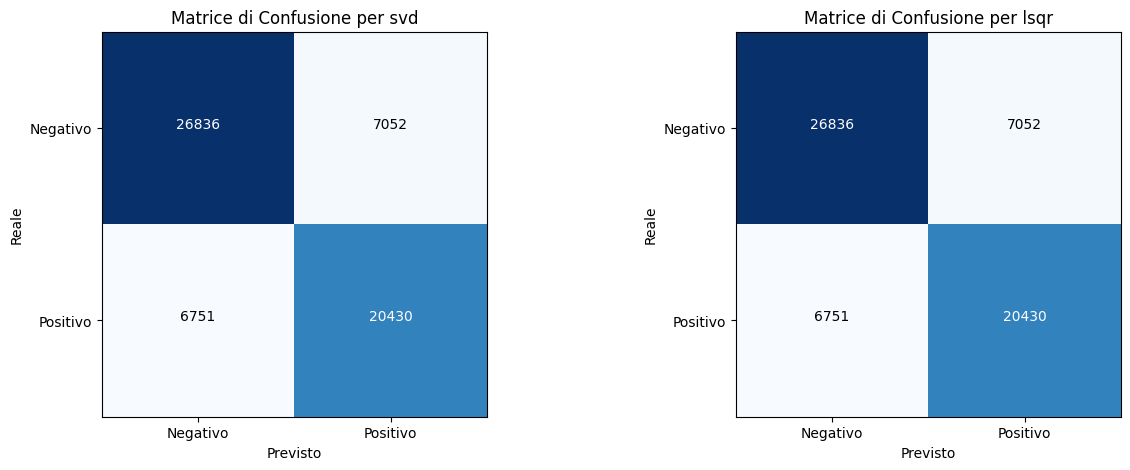

In [17]:
x_train = df_encoded[df_encoded.columns.to_list()[1:]]
y_train = df_encoded['class']
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
beta = 2
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = cross_val_predict(lda, x_train, y_train, cv=c)
# Calcola e salva la metrica di valutazione (ad es. accuratezza)
accuracy1 = accuracy_score(y_train, y_pred)
f2_score1 = fbeta_score(y_train, y_pred, beta=beta)
print("LDA senza considerare la varianza dà accuracy:", accuracy1, "e f2-score:", f2_score1)
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred), 0, axes, 'svd')

lda2 = LinearDiscriminantAnalysis(solver='lsqr')
y_pred = cross_val_predict(lda2, x_train, y_train, cv=c)
accuracy2 = accuracy_score(y_train, y_pred)
f2_score2 = fbeta_score(y_train, y_pred, beta=beta)
print("LDA senza considerando la varianza dà accuracy:", accuracy1, "e f2-score:", f2_score1)
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred), 1, axes, 'lsqr')
plt.show()



Sopra sono mostrate le matrici di confusione per LDA in entrambi i modi di esecuzione. Come si può vedere, usare un metodo o l'altro non cambia i risultati, che in ogni caso non sono ottimali, mostrando come il dataset non sia linearmente separabile.

### Naive Bayes
Naive Bayes è un classificatore generativo che calcola la probabilità che un elemento appartenga a una classe come:
$$ p(C_k|x)=\frac{p(x|C_k)P(C_k)}{p(x)} $$
Dove $ P(C_k) $ viene detta distribuzione a priori e assunta Gaussiana.

Naive Bayes da accuracy: 0.7196286168104931 e f2-score: 0.6548977072970041


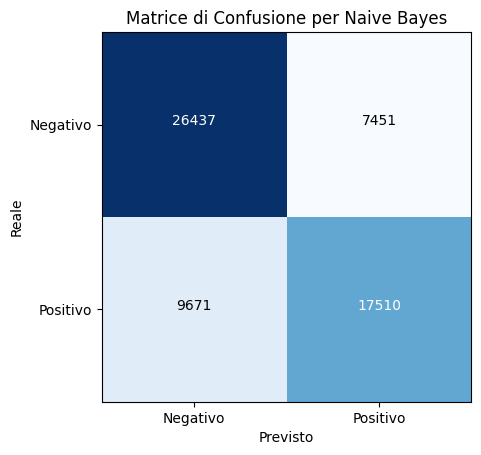

In [18]:
nb = GaussianNB()

x_train = df_encoded[df_encoded.columns.to_list()[1:]]
y_train = df_encoded['class']
y_pred = cross_val_predict(nb, x_train, y_train, cv=c)
accuracy = accuracy_score(y_train, y_pred)

f2_score = fbeta_score(y_train, y_pred, beta=beta)
ConfusionMatrixDisplaySingle(confusion_matrix(y_train, y_pred), 'Naive Bayes')

print("Naive Bayes da accuracy:", accuracy, "e f2-score:", f2_score)
plt.show()

Come si può vedere dai risultati, Naive Bayes da risultati non ottimi come classificatore sul nostro dataset, ha un accuratezza minore rispetto anche a LDA, che già non aveva buone performance. Questo è dato probabilmente dal fatto che questo classificatore assume una distribuzione normale e probabilmente l'assunzione non è corretta per il dataset considerato.

### Logistic Regression
La regressione logistica è un modello discriminativo per la classificazione, in cui si calcola la probabilità condizionata $ p(y|x) $ come una binomiale. Da qui deriva la funzione predittiva
$$ y(x)=\frac{1}{1+e^{-\theta (x)}} $$
dove $ \theta (x) = w^T\bar x $.
Questo modello può essere migliorato con una funzione di penalità per andare a limitare l'overfittig. Possiamo usare valori diversi per il parametro di regolarizzazione della penalità

In [65]:
C=[0.01, 0.05, 0.1, 0.25, 0.4, 0.5, 0.75, 1.0, 1.5]
accuracy_scores=[]
f2_scores=[]
cms = []
for x in C:
  logreg = LogisticRegression(penalty='l2', C=x, solver='newton-cholesky', max_iter=1000)

  # Effettuare previsioni con la validazione incrociata
  y_pred = cross_val_predict(logreg, x_train, y_train, cv=c)

  # Calcolare l'accuratezza delle previsioni
  accuracy = accuracy_score(y_train, y_pred)
  accuracy_scores.append(accuracy)
  f2_score=fbeta_score(y_train, y_pred, beta=2)
  f2_scores.append(f2_score)
  cms.append(confusion_matrix(y_train, y_pred))

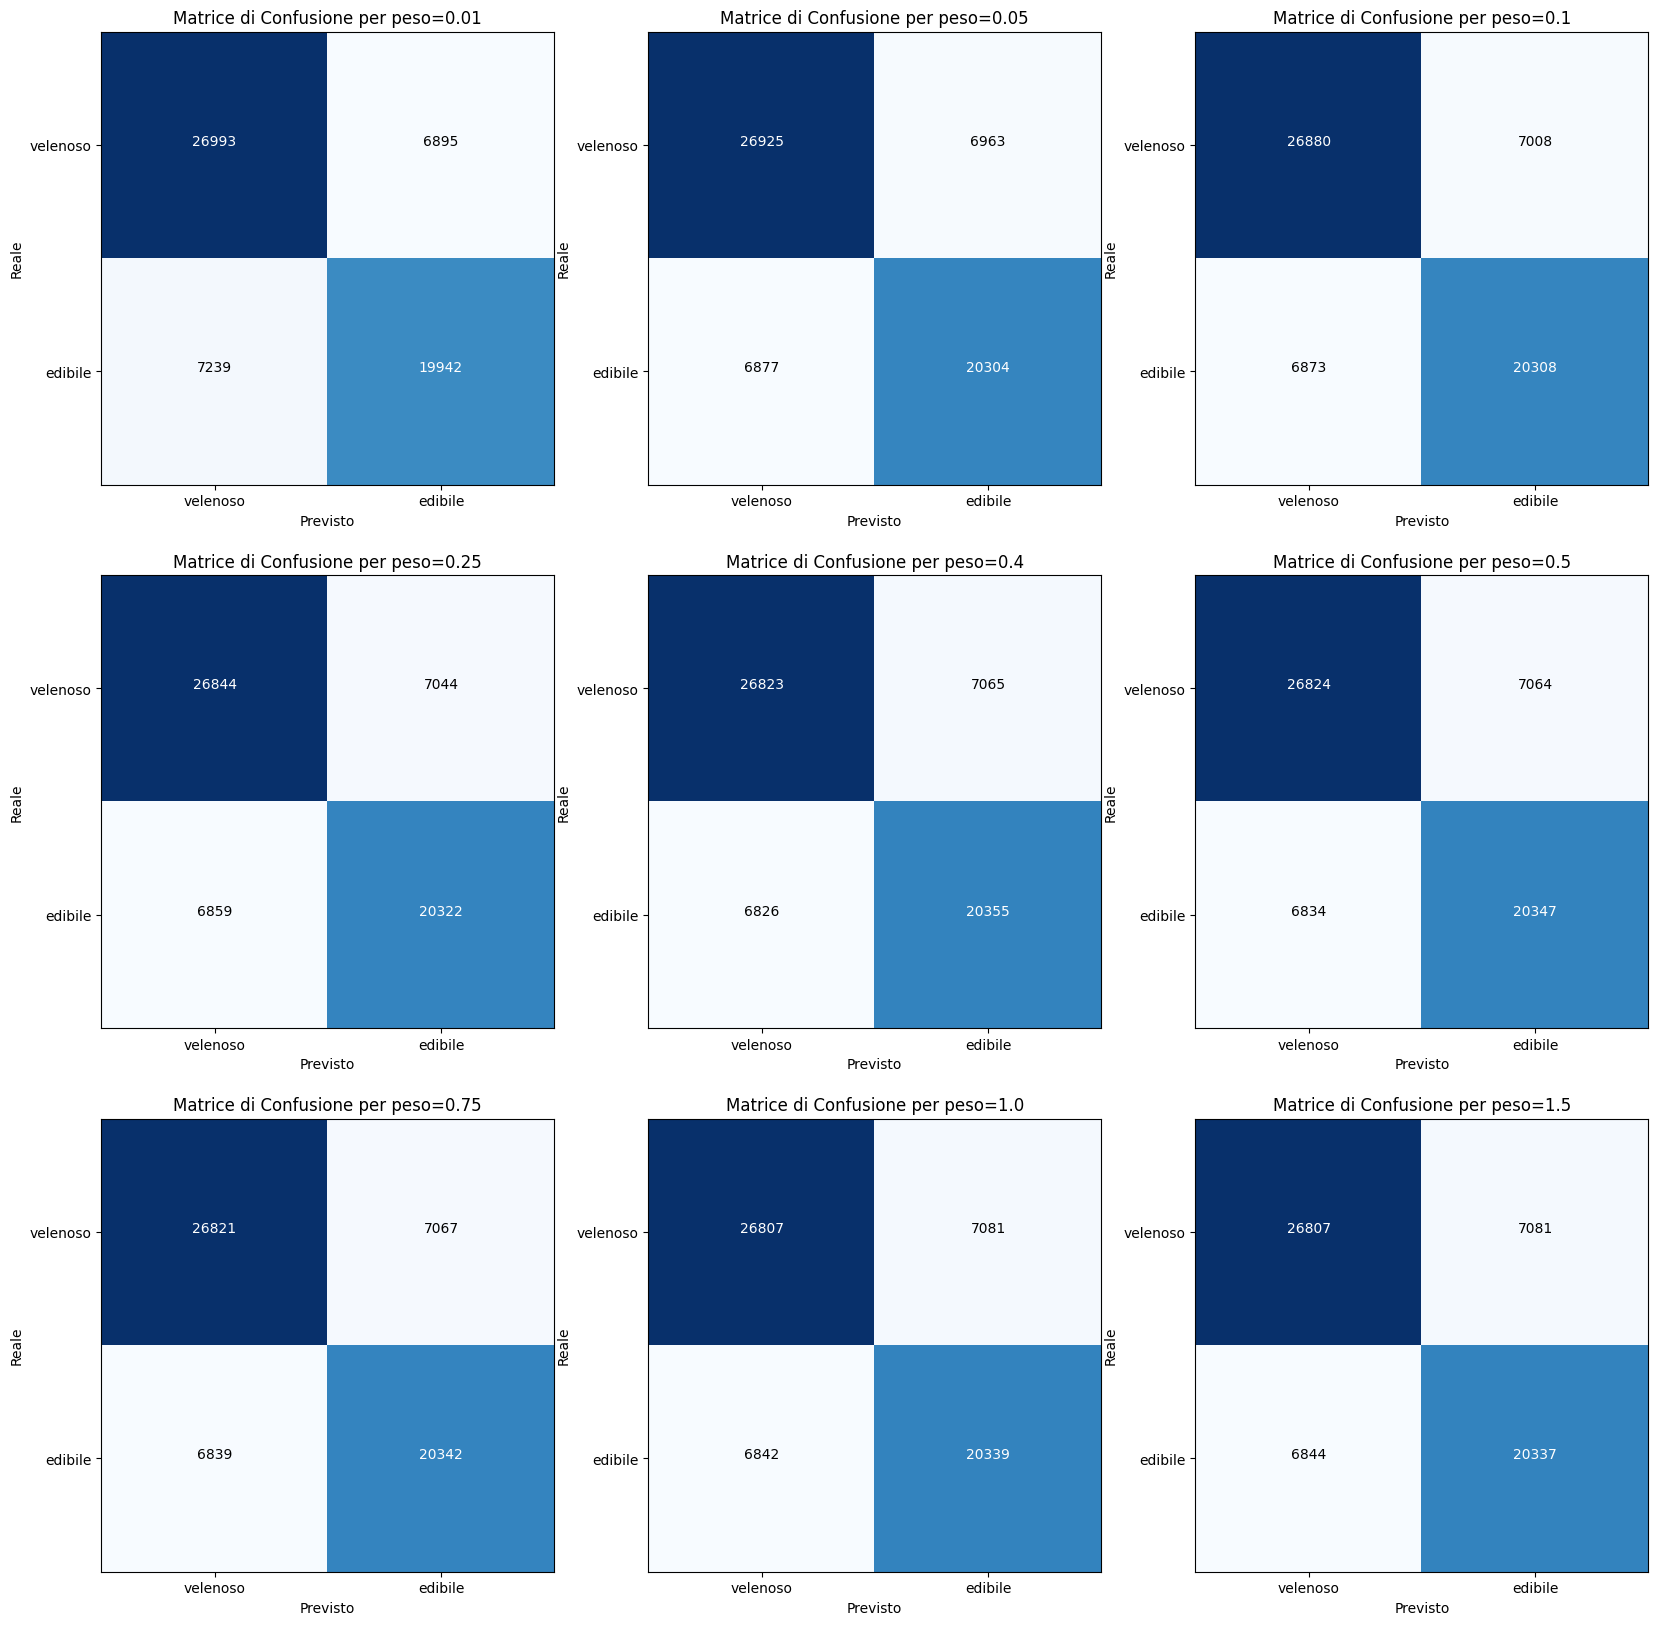

In [68]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
x=0
y=0
i=0
for cm in cms:
  ConfusionMatrixDisplay(cm, y, axes[x], 'peso='+str(C[i]))
  i+=1
  if y==2:
    y=0
    x+=1
  else:
    y+=1
plt.show()

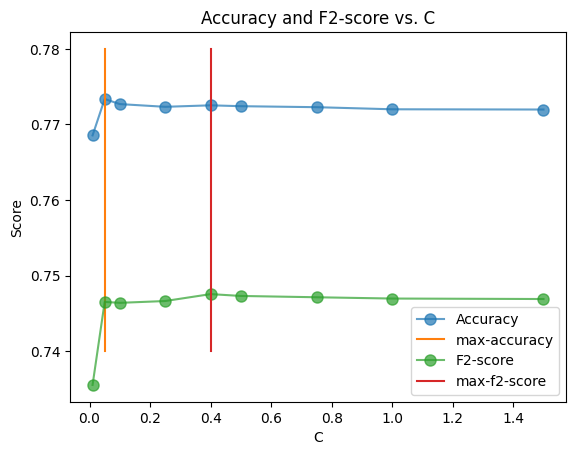

In [69]:
max_C_acc = C[np.argmax(accuracy_scores)]
max_C_f2 = C[np.argmax(f2_scores)]
    # Tracciamento del grafico

plt.plot(C, accuracy_scores, 'o-', markersize=8, alpha=0.7, label='Accuracy')
plt.plot([max_C_acc, max_C_acc], [0.74, 0.78], label='max-accuracy')
plt.plot(C, f2_scores, 'o-', markersize=8, alpha=0.7, label='F2-score')
plt.plot([max_C_f2, max_C_f2], [0.74, 0.78], label='max-f2-score')
plt.legend()
plt.xlabel('C')
plt.ylabel('Score')

plt.title('Accuracy and F2-score vs. C')
plt.show()

Come si può vedere dai grafici, una penalità troppo alta, quindi un parametro C piccolo, porta ad un modello molto inaccurato, mentre una penalità piccola porta ad un modello probabilmente overfitting. L'accuracy e l'f2 score migliori si ottengono per valori diversi del parametro C, rispettivamente 0.4 e 0.05. Come possiamo vedere dalle matrici di confusioni, sebbene complessivamente il modello a 0.4 commetta meno errori, per il nostro obiettivo il modello a 0.05 è migliore dato che ha meno funghi velenosi classificati come edibili

### K-Nearest Neighbour
Questo metodo di classificazione è un metodo non parametrico, questo significa che la predizione viene ricavata direttamente dai dati senza assumere una distribuzione di probabilità. Si fissa un parametro K che corrisponde al numero di item più vicini da considerare, e si assegna al target la classe maggioritaria tra le classi dei vicini. Andiamo a misurare le performance con diversi valori di k per trovare i parametri migliori per il modello. Un altro parametro da far variare è la metrica con cui viene calcolata la distanza, per stabilire quali punti sono vicini. In particolare, andiamo a testare i diversi valori di K per ogni metrica.

la metrica consideratà è: euclidean  e il k è: 1
la metrica consideratà è: euclidean  e il k è: 20
la metrica consideratà è: euclidean  e il k è: 30
la metrica consideratà è: euclidean  e il k è: 50
la metrica consideratà è: euclidean  e il k è: 100
la metrica consideratà è: euclidean  e il k è: 500


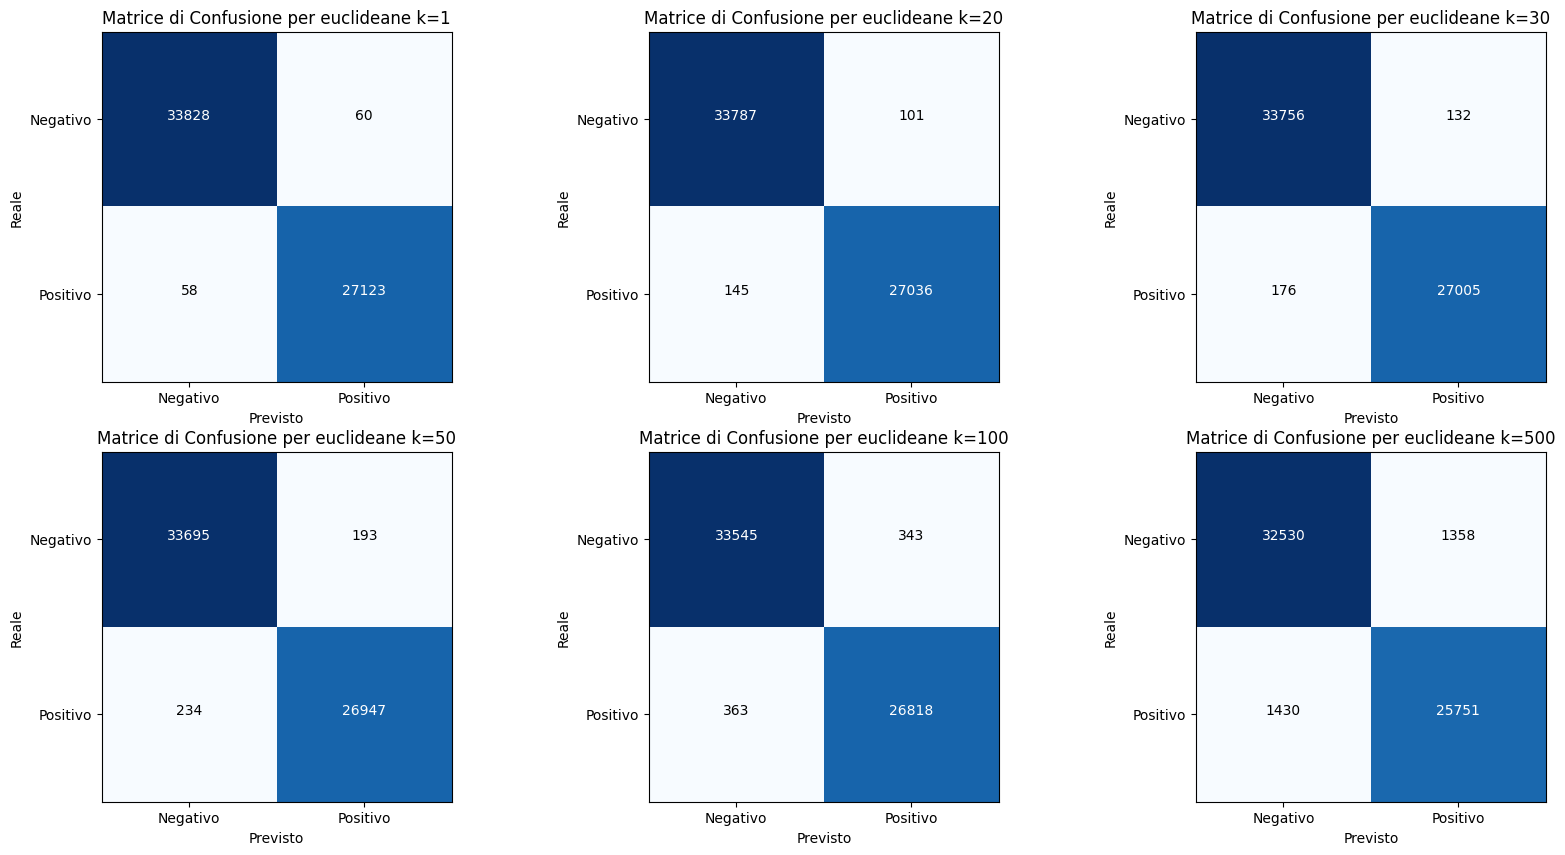

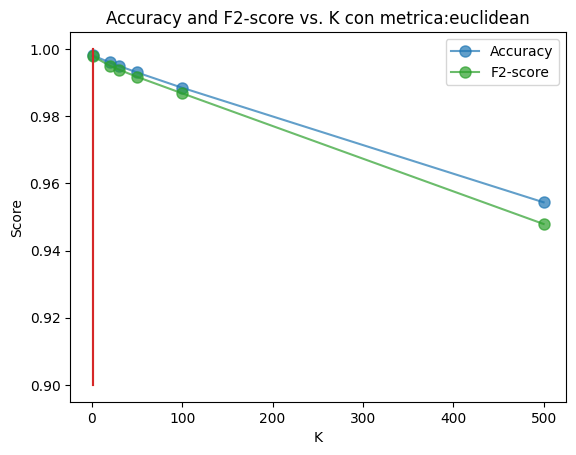

Il modello migliore con metrica euclidean risulta avere k = 1
Questo modello ha accuracy 0.9980677594196729 e f2-score 0.9978514719624448
la metrica consideratà è: chebyshev  e il k è: 1
la metrica consideratà è: chebyshev  e il k è: 20
la metrica consideratà è: chebyshev  e il k è: 30
la metrica consideratà è: chebyshev  e il k è: 50
la metrica consideratà è: chebyshev  e il k è: 100
la metrica consideratà è: chebyshev  e il k è: 500


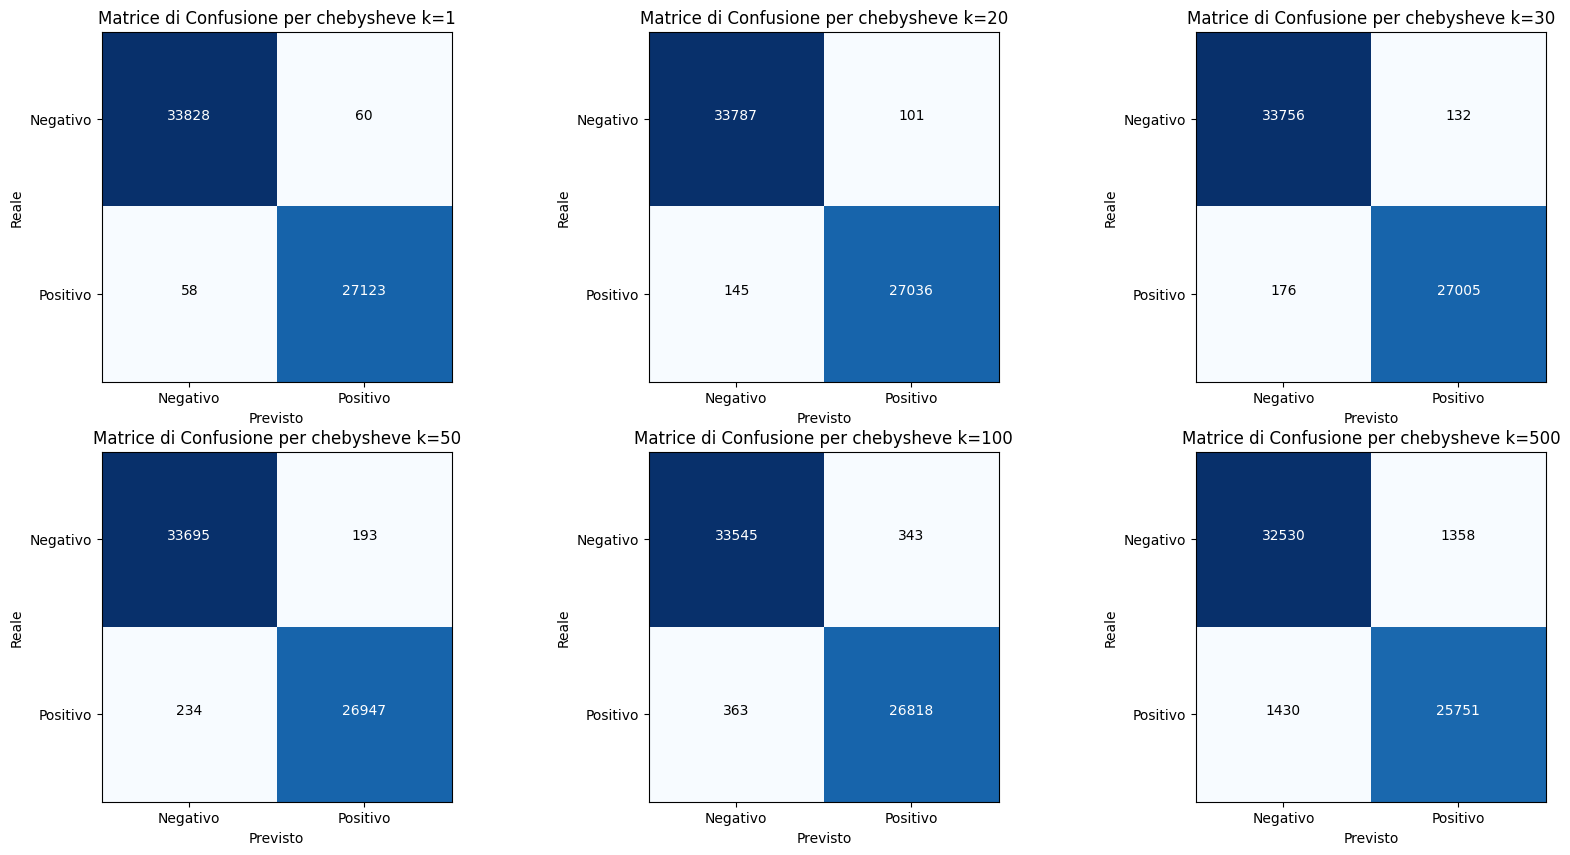

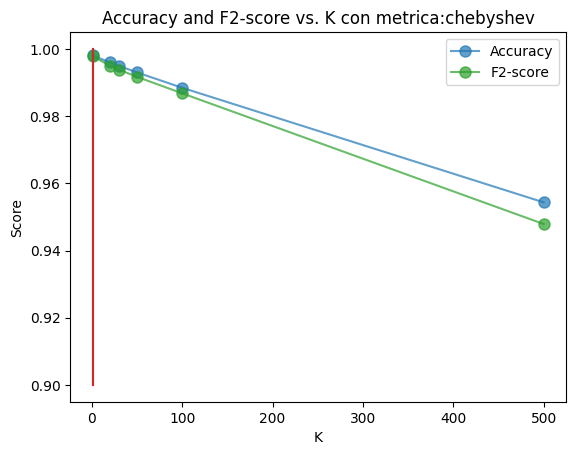

Il modello migliore con metrica chebyshev risulta avere k = 1
Questo modello ha accuracy 0.9980677594196729 e f2-score 0.9978514719624448
la metrica consideratà è: manhattan  e il k è: 1
la metrica consideratà è: manhattan  e il k è: 20
la metrica consideratà è: manhattan  e il k è: 30
la metrica consideratà è: manhattan  e il k è: 50
la metrica consideratà è: manhattan  e il k è: 100
la metrica consideratà è: manhattan  e il k è: 500


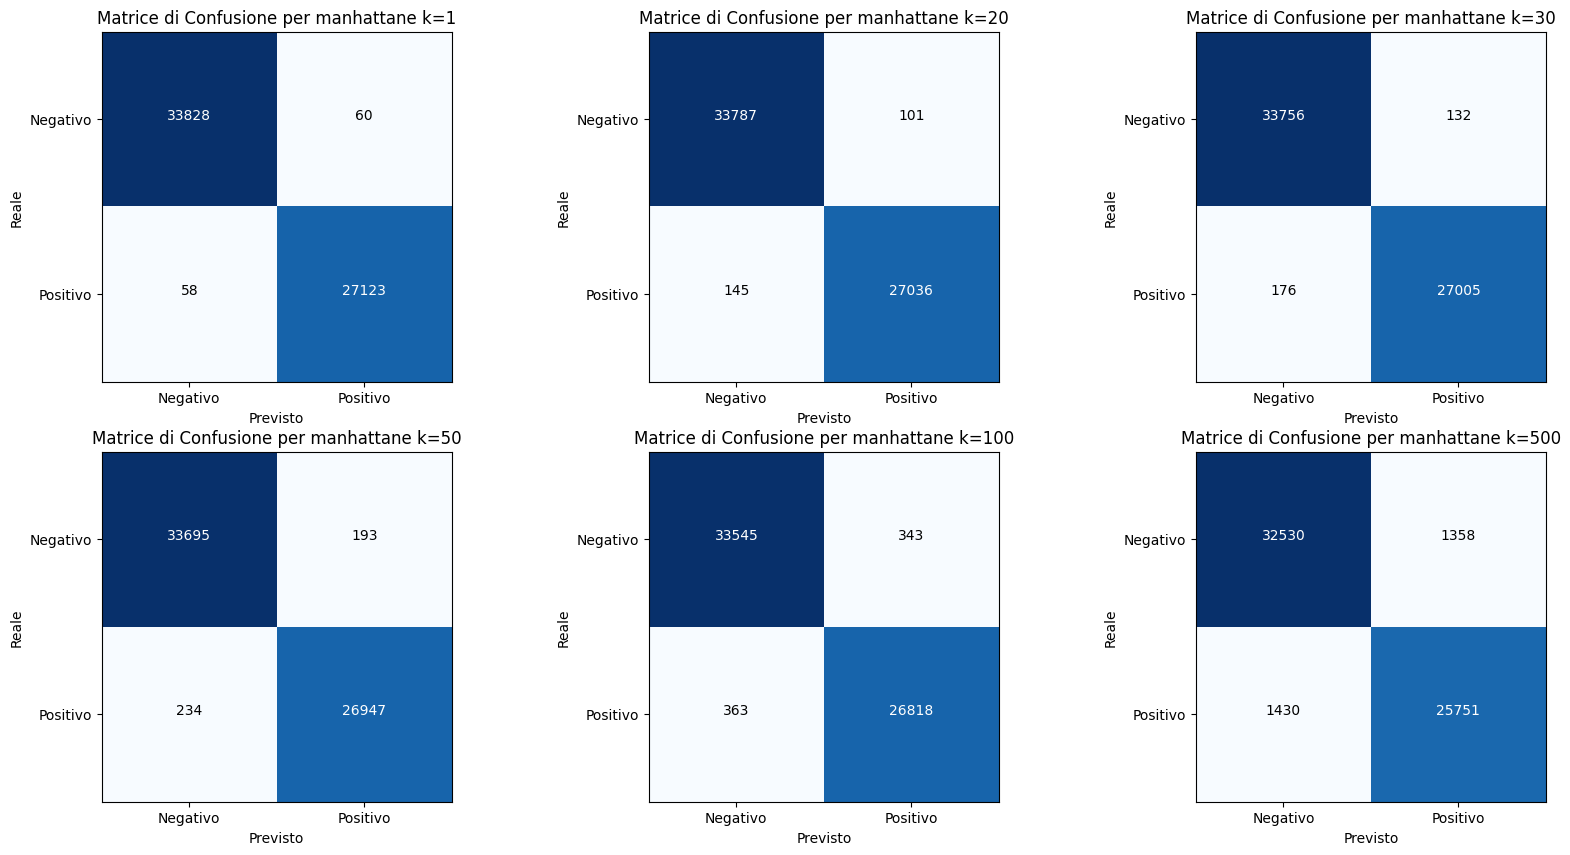

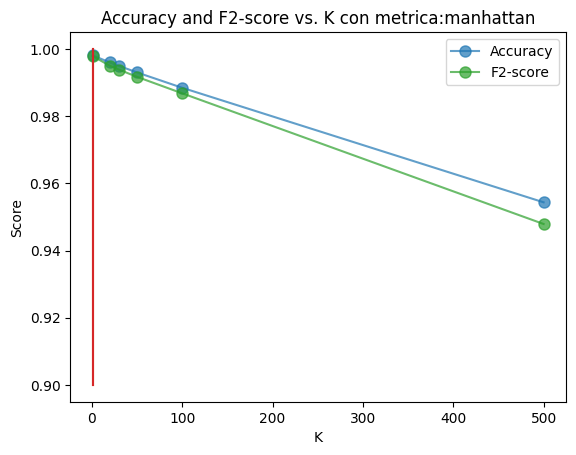

Il modello migliore con metrica manhattan risulta avere k = 1
Questo modello ha accuracy 0.9980677594196729 e f2-score 0.9978514719624448


In [37]:
x_train = df_encoded[df_encoded.columns.to_list()[1:]]
y_train = df_encoded['class']
ks = [1, 20, 30, 50, 100, 500]
metrics = ['euclidean', 'chebyshev', 'manhattan']

beta = 2
for m in metrics:
  fig, axes = plt.subplots(2, 3, figsize=(20, 10))
  x=0
  y=0
  accuracy_scores = []
  f2_scores = []
  for k in ks:
        knn = KNN(n_neighbors=k, metric='euclidean')
        y_pred = cross_val_predict(knn, x_train, y_train, cv=c)
        accuracy = accuracy_score(y_train, y_pred)
        accuracy_scores.append(accuracy)
        f2_score = fbeta_score(y_train, y_pred, beta=beta)
        f2_scores.append(f2_score)
        ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred), y, axes[x], m+'e k='+str(k))
        if y==2:
          y=0
          x+=1
        else:
          y+=1
  plt.show()

  max_k_acc = ks[np.argmax(accuracy_scores)]
  max_k_f2 = ks[np.argmax(f2_scores)]
  max_acc = accuracy_scores[np.argmax(accuracy_scores)]
  max_f2 = f2_scores[np.argmax(f2_scores)]
    # Tracciamento del grafico

  plt.plot(ks, accuracy_scores, 'o-', markersize=8, alpha=0.7, label='Accuracy')
  plt.plot([max_k_acc, max_k_acc], [0.90, 1.0])
  plt.plot(ks, f2_scores, 'o-', markersize=8, alpha=0.7, label='F2-score')
  plt.plot([max_k_f2, max_k_f2], [0.90, 1.0])
  plt.legend()
  plt.xlabel('K')
  plt.ylabel('Score')

  plt.title('Accuracy and F2-score vs. K con metrica:'+m)


  # Mostra il grafico
  plt.show()
  print("Il modello migliore con metrica", m,"risulta avere k =", max_k_f2)
  print("Questo modello ha accuracy", max_acc ,"e f2-score", max_f2)

Come si può vedere dai dati visualizzati qui sopra, variare la metrica di distanza non provoca cambiamenti nelle predizioni. Variare il parametro K invece influisce, si vede in particolare che al crescere del K le predizioni peggiorano. Con un parametro K=1 sia l'accuratezza che l'f2-score hanno valori molto buoni, i migliori ottenuti per ora.

### Decision Tree

DecisionTreeClassifier(criterion='entropy', max_depth=1,
                       min_impurity_decrease=0.5)


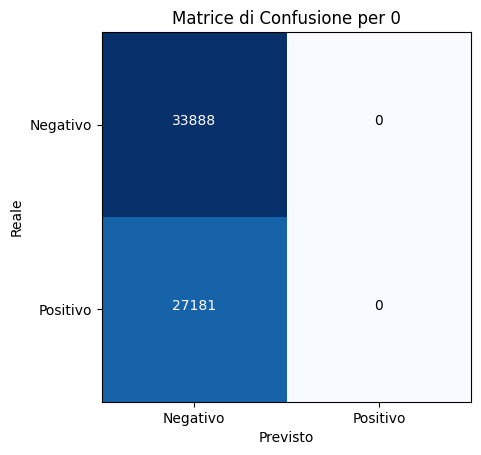

iter:  0
FOR crit:  entropy , depth:  1 , leaf size:  1  and impurity decrease:  0.5
DecisionTreeClassifier(criterion='entropy', max_depth=1,
                       min_impurity_decrease=1)


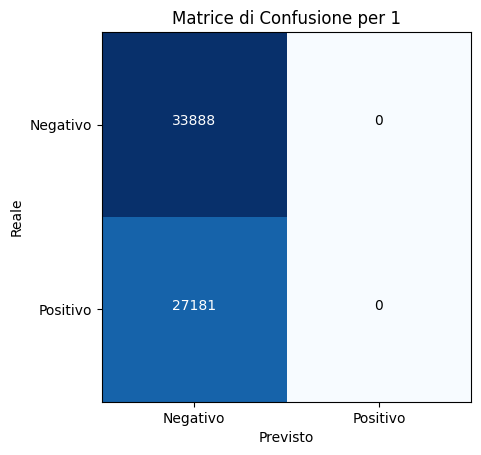

iter:  1
FOR crit:  entropy , depth:  1 , leaf size:  1  and impurity decrease:  1
Leaf size = 1


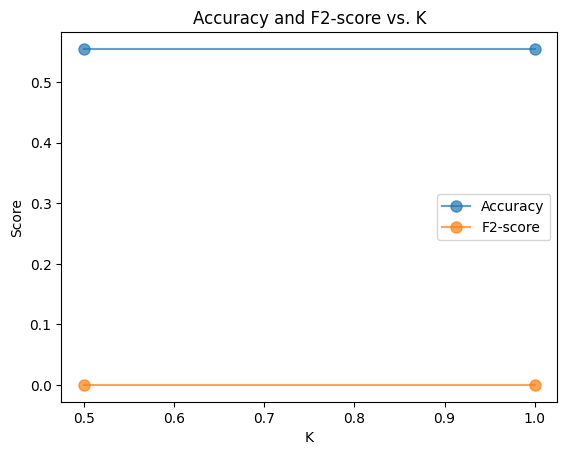

DecisionTreeClassifier(criterion='entropy', max_depth=1,
                       min_impurity_decrease=0.5, min_samples_leaf=100)


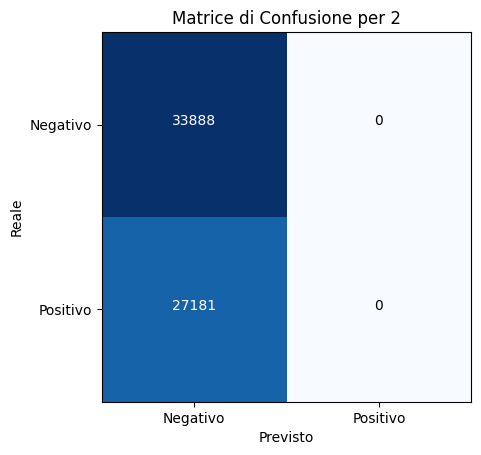

iter:  2
FOR crit:  entropy , depth:  1 , leaf size:  100  and impurity decrease:  0.5
DecisionTreeClassifier(criterion='entropy', max_depth=1,
                       min_impurity_decrease=1, min_samples_leaf=100)


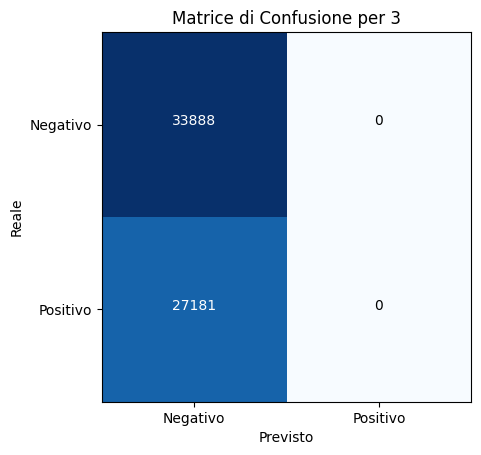

iter:  3
FOR crit:  entropy , depth:  1 , leaf size:  100  and impurity decrease:  1
Leaf size = 100


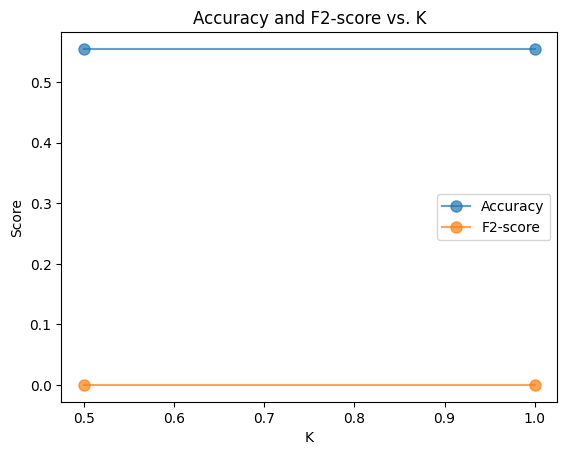

DecisionTreeClassifier(criterion='entropy', max_depth=100,
                       min_impurity_decrease=0.5)


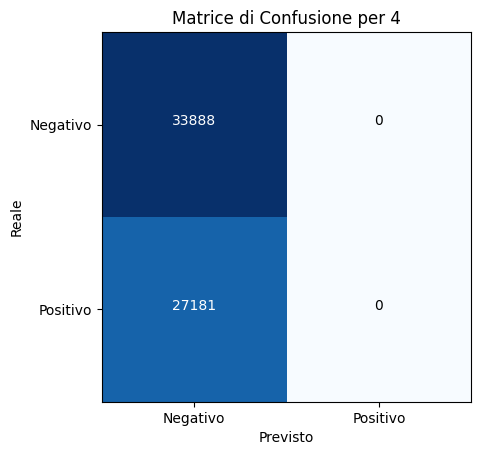

iter:  4
FOR crit:  entropy , depth:  100 , leaf size:  1  and impurity decrease:  0.5
DecisionTreeClassifier(criterion='entropy', max_depth=100,
                       min_impurity_decrease=1)


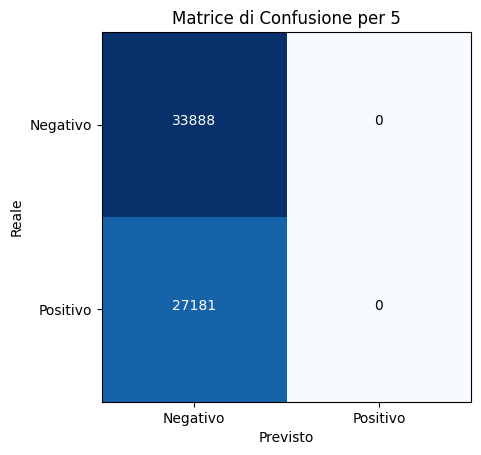

iter:  5
FOR crit:  entropy , depth:  100 , leaf size:  1  and impurity decrease:  1
Leaf size = 1


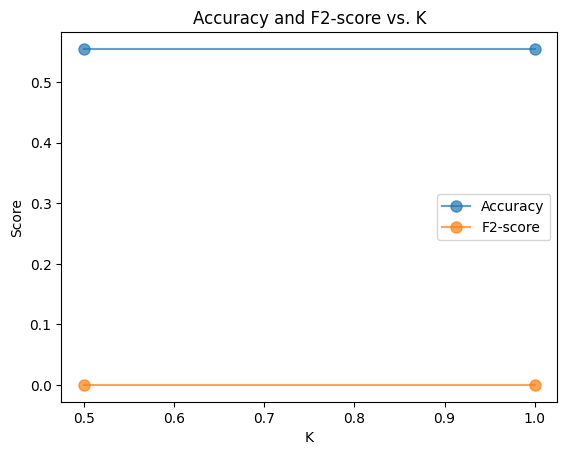

DecisionTreeClassifier(criterion='entropy', max_depth=100,
                       min_impurity_decrease=0.5, min_samples_leaf=100)


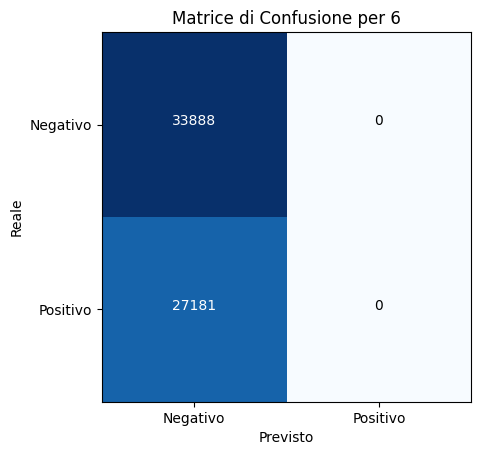

iter:  6
FOR crit:  entropy , depth:  100 , leaf size:  100  and impurity decrease:  0.5
DecisionTreeClassifier(criterion='entropy', max_depth=100,
                       min_impurity_decrease=1, min_samples_leaf=100)


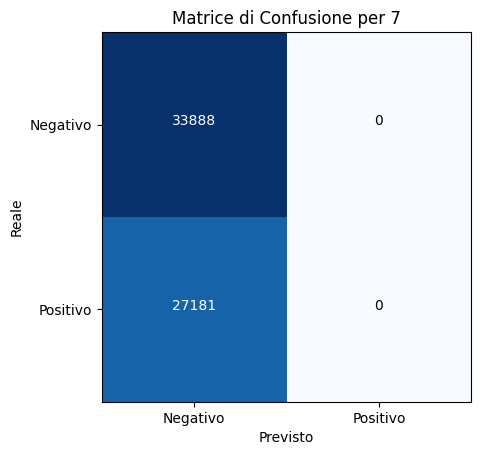

iter:  7
FOR crit:  entropy , depth:  100 , leaf size:  100  and impurity decrease:  1
Leaf size = 100


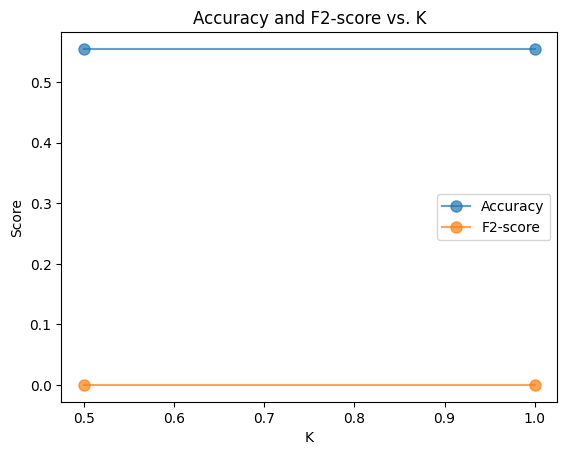

MAX f2_score:  0
for criterion:  0 , depth:  0 , leaf_size:  0 impurity dec:  0 , with n folds:  10
MAX f3_score:  0
for criterion:  0 , depth:  0 , leaf_size:  0 impurity dec:  0 , with n folds:  10
MAX accuracy:  0.5549132947976878
for criterion:  entropy , depth:  1 , leaf_size:  1 impurity dec:  0.5 , with n folds:  10


In [29]:
#0: f2 score, 1: f3 score, 2: accuracy
maxs = [[0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0]]
x_train = df_encoded[df_encoded.columns.to_list()[1:]]
y_train = df_encoded['class']
f3_scores = []
iter = 0
size = len(x_train)
criterions =  ["entropy"]#[ "gini",
max_depths = [1,100]#[ 2, 3, 4, 5, 6, 7, 8]
min_samples_leafs = [1,100]#[ size//100, size//50, size//20, size//10]
min_impurity_decreases = [0.5,1]#[0.05, 0.1, 0.25, 0.5]

def update(target, value, crit, depth, leaf, impurity):
  maxs[target][0] = value
  maxs[target][1] = crit
  maxs[target][2] = depth
  maxs[target][3] = leaf
  maxs[target][4] = impurity


for crit in criterions:
  for depth in max_depths:
    for leaf_size in min_samples_leafs:
      scores = []
      f2_scores = []
      f3_scores = []
      for imp_dec in min_impurity_decreases:
          dt = DecisionTreeClassifier(criterion=crit, max_depth=depth, min_samples_leaf=leaf_size, min_impurity_decrease=imp_dec)
          print(dt)
          y_pred = cross_val_predict(dt, x_train, y_train, cv=c)
          ConfusionMatrixDisplaySingle(confusion_matrix(y_train, y_pred), str(iter))
          plt.show()
          # Calcola e salva la metrica di valutazione (ad es. accuratezza)
          accuracy = accuracy_score(y_train, y_pred)
          scores.append(accuracy)
          if accuracy > maxs[2][0]:
            update(2, accuracy, crit, depth, leaf_size, imp_dec)

          f2_score = fbeta_score(y_train, y_pred, beta=2)
          f2_scores.append(f2_score)
          if f2_score > maxs[0][0]:
            update(0, f2_score, crit, depth, leaf_size, imp_dec)

          f3_score = fbeta_score(y_train, y_pred, beta=3)
          f3_scores.append(f3_score)
          if f3_score > maxs[1][0]:
            update(1, f3_score, crit, depth, leaf_size, imp_dec)

          # Calcola la media delle metriche di valutazione su tutti i fold
          print("iter: ",iter)
          iter = iter+1
          print("FOR crit: ", crit,", depth: ",depth,", leaf size: ",leaf_size," and impurity decrease: ",imp_dec)
      print("Leaf size =", leaf_size)
      plt.plot(min_impurity_decreases, scores, 'o-', markersize=8, alpha=0.7, label='Accuracy')
      plt.plot(min_impurity_decreases, f2_scores, 'o-', markersize=8, alpha=0.7, label='F2-score')
      plt.legend()
      plt.xlabel('K')
      plt.ylabel('Score')

      plt.title('Accuracy and F2-score vs. K')
      plt.show()


print("MAX f2_score: ",maxs[0][0])
print("for criterion: ", maxs[0][1],", depth: ",maxs[0][2],", leaf_size: ",maxs[0][3],"impurity dec: ",maxs[0][4],", with n folds: ", c)

print("MAX f3_score: ",maxs[1][0])
print("for criterion: ", maxs[1][1],", depth: ",maxs[1][2],", leaf_size: ",maxs[1][3],"impurity dec: ",maxs[1][4],", with n folds: ", c)

print("MAX accuracy: ",maxs[2][0])
print("for criterion: ", maxs[2][1],", depth: ",maxs[2][2],", leaf_size: ",maxs[2][3],"impurity dec: ",maxs[2][4],", with n folds: ", c)


### Random Forest
Random forest è un metodo ensamble che prende diversi alberi decisionali e fa la sua predizione andando a valutare la media delle predizioni di ogni albero (bagging). In questo modello abbiamo diversi parametri di cui possiamo fare tuning:
* la massima profondità per ogni albero
* il numero di alberi selezionati
* il criterio con cui viene valutata l'omogeneità di un nodo durantre lo splitting

In [87]:
class TreeInfo:
    def __init__(self,cm, criterion='', depth=0, n_estimators=0, accuracy=0, f2=0, f3=0):
        self.criterion = criterion
        self.depth = depth
        self.n_estimators = n_estimators
        self.accuracy = accuracy
        self.f2 = f2
        self.f3 = f3
        self.cm=cm
    def get_parametri(self):
        return [self.criterion, self.depth, self.n_estimators, self.accuracy, self.f2, self.f3, self.cm]
    def get_depth(self):
      return self.depth
    def get_n_est(self):
      return self.n_estimators
    def get_acc(self):
      return self.accuracy
    def get_f2(self):
      return self.f2
    def get_cm(self):
      return self.cm
    def get_crit(self):
      return self.criterion


In [91]:
x_train = df_encoded[df_encoded.columns.to_list()[1:]]
y_train = df_encoded['class']
max_depths = [2,3,4,5,6,7,8]
criterions = [ "gini", "entropy" ]
n_estimators = [10, 50, 100]
info=[]

for crit in criterions:
  for estimators in n_estimators:
    for depth in max_depths:
      rf = RandomForestClassifier(criterion = crit, n_estimators= estimators, max_depth= depth)
      y_pred = cross_val_predict(rf, x_train, y_train, cv=10)
      accuracy = accuracy_score(y_train, y_pred)
      f2_score = fbeta_score(y_train, y_pred, beta=2)
      f3_score = fbeta_score(y_train, y_pred, beta=3)
      cm=confusion_matrix(y_train, y_pred)
      tree = TreeInfo(cm, crit, estimators, depth, accuracy, f2_score, f3_score)
      info.append(tree)

Come si può vedere dai grafici qui sotto, indifferentemente dal numero di stimatori considerato e dal criterio considerato, all'aumentare della profondità degli alberi sia accuratezza che f2-score tendono a migliorare.



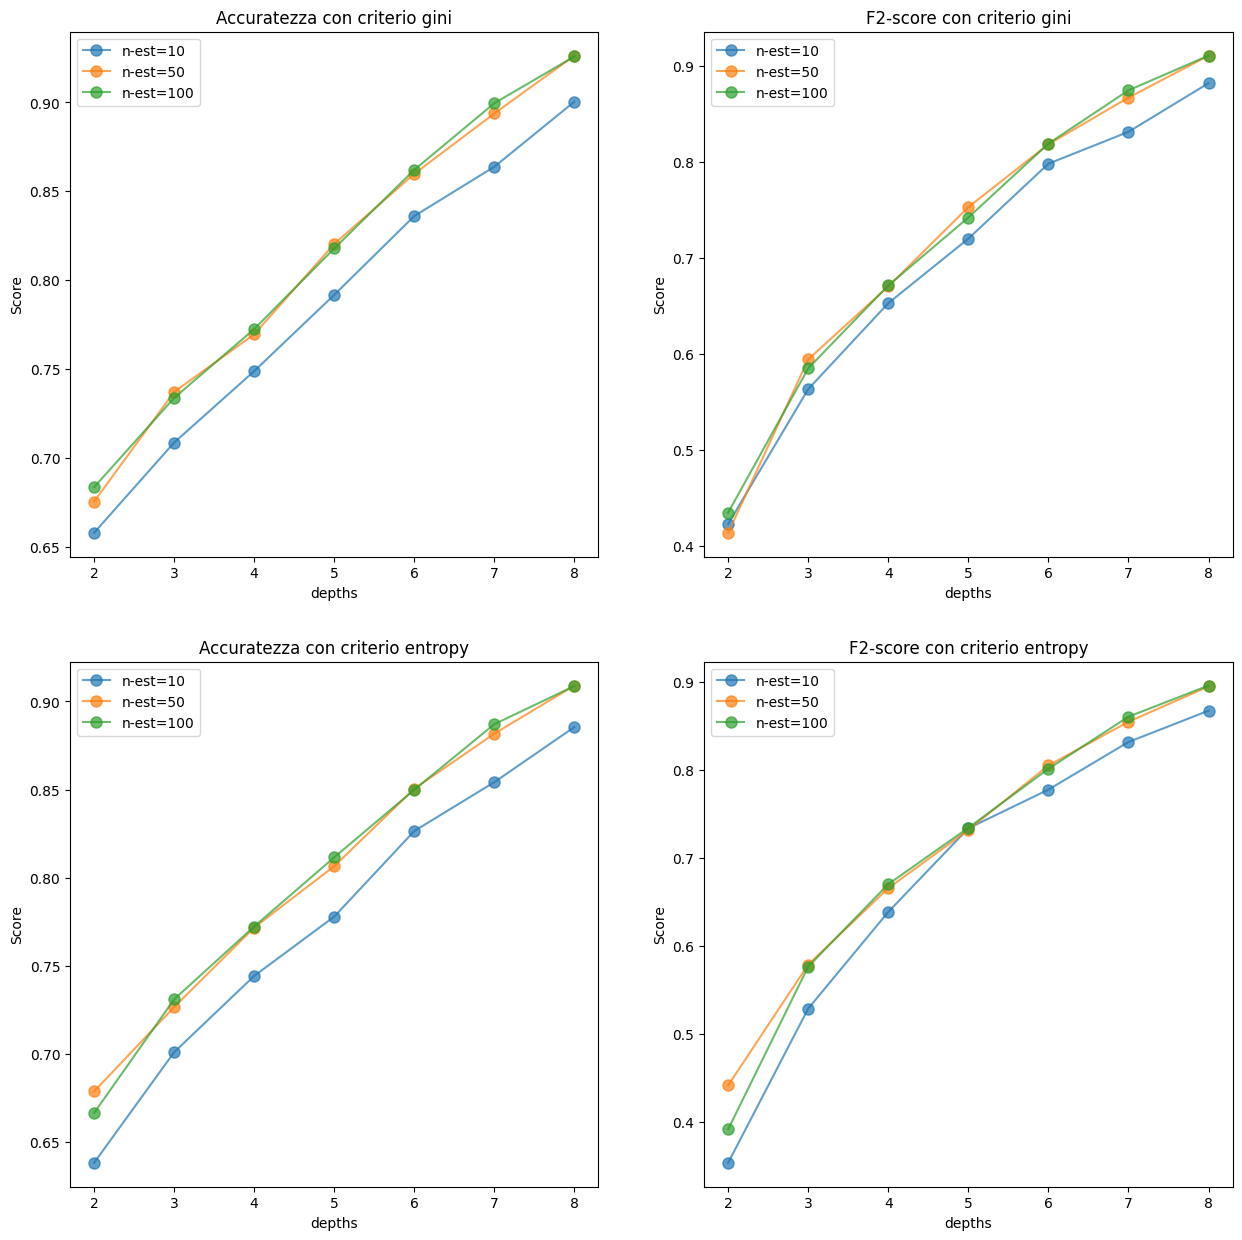

In [107]:
est_g_acc = []
est_g_f2 = []
est_e_acc = []
est_e_f2 = []
for s in n_estimators:
  g_acc = []
  g_f2 = []
  e_acc = []
  e_f2 = []
  for elem in info:
    if elem.get_depth() == s:
      if elem.get_crit() == "gini":
        g_acc.append(elem.get_acc())
        g_f2.append(elem.get_f2())
      else:
        e_acc.append(elem.get_acc())
        e_f2.append(elem.get_f2())
  est_g_f2.append(g_f2)
  est_g_acc.append(g_acc)
  est_e_acc.append(e_acc)
  est_e_f2.append(e_f2)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i in range(0,len(est_g_acc)):
    # Tracciamento del grafico

  axes[0][0].plot(max_depths, est_g_acc[i], 'o-', markersize=8, alpha=0.7, label='n-est='+str(n_estimators[i]))
  axes[0][1].plot(max_depths, est_g_f2[i], 'o-', markersize=8, alpha=0.7, label='n-est='+str(n_estimators[i]))
  axes[1][0].plot(max_depths, est_e_acc[i], 'o-', markersize=8, alpha=0.7, label='n-est='+str(n_estimators[i]))
  axes[1][1].plot(max_depths, est_e_f2[i], 'o-', markersize=8, alpha=0.7, label='n-est='+str(n_estimators[i]))
  axes[0][0].legend()
  axes[0][1].legend()
  axes[1][0].legend()
  axes[1][1].legend()
  axes[0][0].set_xlabel('depths')
  axes[0][0].set_ylabel('Score')
  axes[0][1].set_xlabel('depths')
  axes[0][1].set_ylabel('Score')
  axes[1][0].set_xlabel('depths')
  axes[1][0].set_ylabel('Score')
  axes[1][1].set_xlabel('depths')
  axes[1][1].set_ylabel('Score')

  axes[0][0].set_title('Accuratezza con criterio gini')
  axes[0][1].set_title('F2-score con criterio gini')
  axes[1][0].set_title('Accuratezza con criterio entropy')
  axes[1][1].set_title('F2-score con criterio entropy')
plt.show()


Dal grafico sottostante, che mostra come variano accuratezza ed f2-score al variare del numero di stimatori, si può vedere come il criterio gini per l'omogeneità dei nodi dia risultati migliori, e come con 50 stimatori si raggiunge un buon livello di accuratezza, aumentare ancora non porta miglioramenti, porta anche una leggera diminuzione.

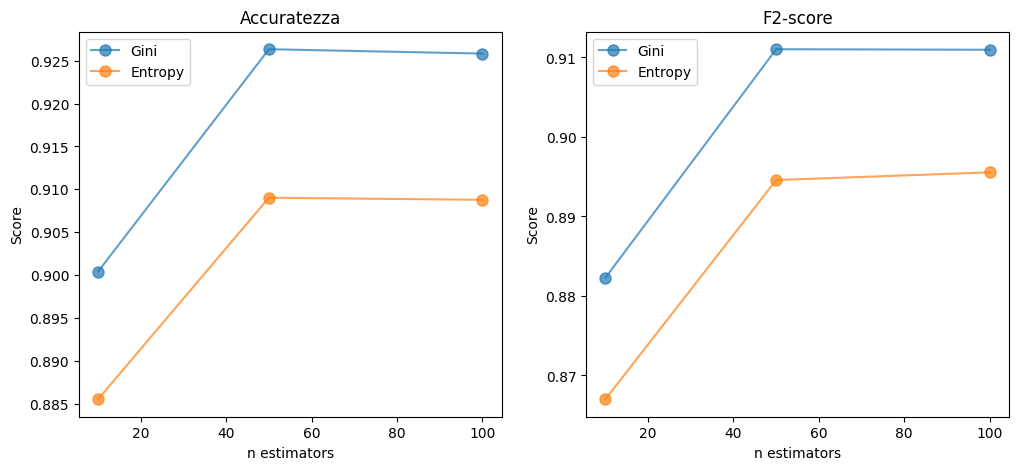

In [110]:
g_acc = []
g_f2 = []
e_acc = []
e_f2 = []
for elem in info:
  if elem.get_n_est() == 8:
    if elem.get_crit() == "gini":
      g_acc.append(elem.get_acc())
      g_f2.append(elem.get_f2())
    else:
      e_acc.append(elem.get_acc())
      e_f2.append(elem.get_f2())
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(n_estimators, g_acc, 'o-', markersize=8, alpha=0.7, label='Gini')
axes[0].plot(n_estimators, e_acc, 'o-', markersize=8, alpha=0.7, label='Entropy')
axes[1].plot(n_estimators, g_f2, 'o-', markersize=8, alpha=0.7, label='Gini')
axes[1].plot(n_estimators, e_f2, 'o-', markersize=8, alpha=0.7, label='Entropy')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel('n estimators')
axes[0].set_ylabel('Score')
axes[1].set_xlabel('n estimators')
axes[1].set_ylabel('Score')

axes[0].set_title('Accuratezza')
axes[1].set_title('F2-score')
plt.show()


Nella configurazione migliore, ovvero critetio gini, profondità 8 e cinquanta stimatori, la matrice di confusione è la seguente:
Nonostante con questa configurazione le predizioni siano molto buone, non arrivano ancora ai livelli di k-nearest neighbor che si conferma per ora il predittore migliore.

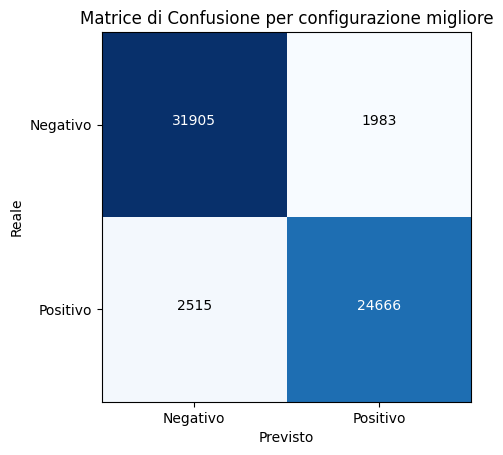

In questa configurazione abbiamo accuracy: 0.9263456090651558 e f2-score: 0.9110383902255251


In [112]:
for elem in info:
  if elem.get_n_est() == 8:
    if elem.get_depth() == 50:
      if elem.get_crit() == "gini":
        ConfusionMatrixDisplaySingle(elem.get_cm(), 'configurazione migliore')
        plt.show()
        print("In questa configurazione abbiamo accuracy:", elem.get_acc(),"e f2-score:", elem.get_f2())